Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Caleb Andree"
COLLABORATORS = ""

---

# LAB 10 Food scraping [Total: 6 points]

The purpose of this assignment is for you to put together all the things you have learned this semester. This will be accomplished through a coding assignment. In particular, you will the the [Food Data Central API](https://fdc.nal.usda.gov/api-guide.html) from the US Department of Agriculture to pull the nutritional content of various common foods. You will carry out this task in the present notebook, and use the notebook to document the various steps of the exercise and to answer all questions.

## Required skills

This lab will let you practice the following:

- Web Scraping / APIs
- Data Wrangling
- Data Visualization
- Data structures (JSON)
- Data frames
- Summarizing data

## Table of Contents
<ul>
    <li><a href="#Submission-checklist">Submission checklist</a> [1 pt]</li>
    <li><a href="#API-setup-instructions">API setup instructions</a></li>
    <li><a href="#Q1">Question 1</a> [1 pt]</li>
    <li><a href="#Q2">Question 2</a> [1 pt]</li>
    <li><a href="#Q3">Question 3</a> [1 pt]</li>
    <li><a href="#Q4">Question 4</a> [1 pt]</li>
    <li><a href="#Q5">Question 5</a> [1 pts]</li>
</ul>

## Submission checklist

**Points**: 1

Before submitting make sure that:

1. Your name is included above, plus the name of any collaborator you worked with;
2. All Markdown cells you edited are rendering correctly, especially the ones with answers.
3. You have removed any `raise NotImplementedError()` line from your code cells.
4. ⚡**NEW**⚡ You have included your API key in the notebook so we can re-run your code. (See instructions below.)

## API setup instructions

<div class="alert alert-warning">⚠️ For any issue with registering your API key, please contact the <a src="https://fdc.nal.usda.gov/contact.html">Food Data Central team</a>. We are unable to assist with API registration issues. ⚠️</div>

To work on this notebook you need to register an API key. Please follow these instructions to do so:
1. Go to https://fdc.nal.usda.gov/api-key-signup.html;
2. Enter your first name, last name, and UMD email address;
3. Click on the sign up button;
4. Wait for the email with the API key. You should receive a confirmation email in a few minutes.

You should familiarize with the [API developer manual](https://api.data.gov/docs/developer-manual/) that explains how to use the newly created API key in your code.

## Q1

**Points**: 1

The FoodCentral database contains nutrient information (e.g. amount dietary fibers) of various food products (e.g. pizza, pasta, etc.). Write a function called `food_nutrients` that uses the `GET /v1/foods/search` endpoint [[API docs](https://fdc.nal.usda.gov/api-guide.html#bkmk-6)] to summarize the nutrient information of the most common types of foods. 

Note that the search endpoint returns all grocery items that match a particular query. For example, a search for &ldquo;chicken&rdquo; may return both &ldquo;_chicken_ breasts&rdquo; and &ldquo;fried _chicken_&rdquo;. To keep things simple, your function should return the average nutrient value across different food products.

Your function should take a single parameters &mdash; a query string. Using the key created above, your function should query the API with the given string and return a dataframe with three columns (in this order):
* `nutrientName` (dtype: `object`) &ndash; the name of the nutrient;
* `value` (dtype: `float64`) &ndash; the average amount of the nutrient across all products that match the query;
* `unitName` (dtype: `object`) &ndash; the unit of measurement associated to the nutrient.

In addition, your function should filter the results to keep only the most common nutrients, and abbreviate the name of the nutrients to simplify the rest of the analysis. The following table lists the nutrients to include in the data frame, and how they should be renamed after cleaning.

| Nutrient name from API | Cleaned nutrient name |
| --------- | --------- |
| `Energy`  | `Energy`  |
| `Sugars, total including NLEA` | `Sugar` |
| `Carbohydrate, by difference` | `Carbs` |
| `Protein` | `Protein` |
| `Fiber, total dietary` | `Fiber` |
| `Total lipid (fat)` | `Fat` |
| `Fatty acids, total saturated` | `Sat_Fatty_Acids`
| `Fatty acids, total trans` | `Trans_Fatty_Acids` |
| `Fatty acids, total polyunsaturated` | `Unsat_Fatty_Acids` |
| `Cholesterol` | `Cholesterol` |
| `Calcium, Ca` | `Calcium` |
| `Iron, Fe` | `Iron` |
| `Sodium, Na` | `Sodium` |
| `Potassium, K` | `Potassium` |
| `Vitamin A, IU` | `VitaminA` |
| `Vitamin C, total ascorbic acid` | `VitaminC` |
| `Vitamin D (D2 + D3), International Units` | `VitaminD` |

For example, if the requested food `"pizza"`, then you should get the following data frame:
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>nutrientName</th>
      <th>value</th>
      <th>unitName</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Calcium</td>
      <td>178.500000</td>
      <td>MG</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Carbs</td>
      <td>28.895400</td>
      <td>G</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Cholesterol</td>
      <td>26.720000</td>
      <td>MG</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Energy</td>
      <td>577.786667</td>
      <td>KCAL</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Fat</td>
      <td>12.127600</td>
      <td>G</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Fiber</td>
      <td>1.784000</td>
      <td>G</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Iron</td>
      <td>1.944600</td>
      <td>MG</td>
    </tr>
    <tr>
      <th>7</th>
      <td>Potassium</td>
      <td>201.684211</td>
      <td>MG</td>
    </tr>
    <tr>
      <th>8</th>
      <td>Protein</td>
      <td>11.420400</td>
      <td>G</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Sat_Fatty_Acids</td>
      <td>5.143000</td>
      <td>G</td>
    </tr>
    <tr>
      <th>10</th>
      <td>Sodium</td>
      <td>618.760000</td>
      <td>MG</td>
    </tr>
    <tr>
      <th>11</th>
      <td>Sugar</td>
      <td>3.326800</td>
      <td>G</td>
    </tr>
    <tr>
      <th>12</th>
      <td>Trans_Fatty_Acids</td>
      <td>0.187065</td>
      <td>G</td>
    </tr>
    <tr>
      <th>13</th>
      <td>Unsat_Fatty_Acids</td>
      <td>2.298622</td>
      <td>G</td>
    </tr>
    <tr>
      <th>14</th>
      <td>VitaminA</td>
      <td>403.357143</td>
      <td>IU</td>
    </tr>
    <tr>
      <th>15</th>
      <td>VitaminC</td>
      <td>3.004082</td>
      <td>MG</td>
    </tr>
    <tr>
      <th>16</th>
      <td>VitaminD</td>
      <td>0.083333</td>
      <td>IU</td>
    </tr>
  </tbody>
</table>

In [2]:
import pandas as pd
import requests

URL = "https://api.nal.usda.gov/fdc/v1/foods/search"
api_key = 'Ne89cpPQu8jJX369N7p3DT7UTZ1FcxcmFf0pBn89'
# YOUR CODE HERE
def food_nutrients(query):
    params = {"api_key": api_key, "query": query}

    response = requests.get(URL, params=params)

    if response.status_code == 200:
        data = response.json()
        if data and 'foods' in data and data['foods']:
            nutrient_list = []
            for food in data['foods']:
                if 'foodNutrients' in food:
                    nutrient_list.extend(food['foodNutrients'])

            df = pd.DataFrame(nutrient_list)

            nutrient_mapping = {
                'Energy': 'Energy',
                'Sugars, total including NLEA': 'Sugar',
                'Carbohydrate, by difference': 'Carbs',
                'Protein': 'Protein',
                'Fiber, total dietary': 'Fiber',
                'Total lipid (fat)': 'Fat',
                'Fatty acids, total saturated': 'Sat_Fatty_Acids',
                'Fatty acids, total trans': 'Trans_Fatty_Acids',
                'Fatty acids, total polyunsaturated': 'Unsat_Fatty_Acids',
                'Cholesterol': 'Cholesterol',
                'Calcium, Ca': 'Calcium',
                'Iron, Fe': 'Iron',
                'Sodium, Na': 'Sodium',
                'Potassium, K': 'Potassium',
                'Vitamin A, IU': 'VitaminA',
                'Vitamin C, total ascorbic acid': 'VitaminC',
                'Vitamin D (D2 + D3), International Units': 'VitaminD'
            }

            df = df[df['nutrientName'].isin(nutrient_mapping.keys())]
            df['nutrientName'] = df['nutrientName'].map(nutrient_mapping)

            result_df = df.groupby('nutrientName').agg({'value': 'mean', 'unitName': 'first'}).reset_index()

            return result_df


#raise NotImplementedError()

Use this cell to test your code. You should try it with different foods, like `"apple"` or `"friend chicken"`.

In [3]:
query = 'pizza'
food_nutrients(query)

,nutrientName,value,unitName
0,Calcium,178.500000,MG
1,Carbs,28.895400,G
2,Cholesterol,26.720000,MG
3,Energy,577.786667,KCAL
4,Fat,12.127600,G
5,Fiber,1.784000,G
6,Iron,1.944600,MG
7,Potassium,201.684211,MG
8,Protein,11.420400,G
9,Sat_Fatty_Acids,5.143000,G


The cell below will run your function in the autograder using different inputs.

In [4]:
import pandas as pd
from pandas.testing import assert_frame_equal

def _q1autograder(query):
    fname = f'.solution1-{query.replace(" ", "_")}.csv'
    q1STUDENT_ANSWER = food_nutrients(query)
    q1CORRECT_ANSWER = pd.read_csv(fname)

    # Return value should match solution
    try:
        print(f"Testing that food_nutrients(\"{query}\") returns correct data frame".ljust(76, "."), end="")
        assert_frame_equal(q1STUDENT_ANSWER, q1CORRECT_ANSWER)
        print("PASSED.")
    except AssertionError:
        print("FAILED!")
        print()
        print("Error: your solution does not match the correct one. See below for mismatching entries.")
        print()
        idx = (q1STUDENT_ANSWER != q1CORRECT_ANSWER).any(axis=1)
        print("Mismatching entries")
        print("===================")
        print()
        print("Correct: ")
        print(q1CORRECT_ANSWER[idx])
        print()
        print("Student:")
        print(q1STUDENT_ANSWER[idx])

_q1CASES = ['pizza', 'chicken', 'apple', 'pasta']
        
for _case in _q1CASES:
    _q1autograder(_case)

#if no test failed, print
print("\nAll tests passed! 👍")

Testing that food_nutrients("pizza") returns correct data frame.............PASSED.
Testing that food_nutrients("chicken") returns correct data frame...........PASSED.
Testing that food_nutrients("apple") returns correct data frame.............PASSED.
Testing that food_nutrients("pasta") returns correct data frame.............PASSED.

All tests passed! 👍


## Q2
**Points**: 1

Write a function called `menu_nutrients` that returns the main nutritional information of a menu (i.e. a list of foods).

Your function should take a single parameter &mdash; a list of food names (i.e. a menu). It should call the `food_nutrients` function for each food in the menu and return a data frame with the following columns (all with dtype `float64`):
- Energy
- Carbs
- Protein
- Fiber
- Fat

Your function should also replace all missing values (`NaN`) with zeroes.

For example, if the menu is `['apple', 'fried chicken', 'pizza']` then your function should return the following data frame.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Energy</th>
      <th>Carbs</th>
      <th>Protein</th>
      <th>Fiber</th>
      <th>Fat</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>bread</th>
      <td>543.155172</td>
      <td>80.402000</td>
      <td>13.8078</td>
      <td>5.514583</td>
      <td>8.779600</td>
    </tr>
    <tr>
      <th>cheese</th>
      <td>357.862745</td>
      <td>10.044000</td>
      <td>18.6090</td>
      <td>0.328571</td>
      <td>25.960400</td>
    </tr>
    <tr>
      <th>chocolate</th>
      <td>460.346939</td>
      <td>53.817959</td>
      <td>5.7506</td>
      <td>3.733333</td>
      <td>26.314694</td>
    </tr>
  </tbody>
</table>

### Hint

You may find it useful to use the `pivot` function for this task.

In [17]:
import pandas as pd

# YOUR CODE HERE
def menu_nutrients(menu):
    nutrients_list = []

    for food in menu:
        nutrients = food_nutrients(food)

        if nutrients is not None:
            nutrients['food'] = food
            nutrients_list.append(nutrients)

    result_df = pd.concat(nutrients_list, ignore_index=True)

    result_df = result_df.pivot(index='food', columns='nutrientName', values='value').reset_index()

    result_df = result_df.fillna(0)
    result_df = result_df.set_index('food')
    result_df.index.name = None
    result_df.columns.name = None




    result_df = result_df[['Energy', 'Carbs', 'Protein', 'Fiber', 'Fat']]

    return result_df
#raise NotImplementedError()

Use this cell to test your code. You should try it with different menus, for example bread, cheese, and chocolate.

In [19]:
menu = ['bread', 'cheese', 'chocolate']
menu_nutrients(menu)

,Energy,Carbs,Protein,Fiber,Fat
bread stuffing,375.474576,28.064200,8.5482,2.416000,9.848200
cheese,357.862745,10.044000,18.6090,0.328571,25.960400
chocolate,460.346939,53.817959,5.7506,3.733333,26.314694


The cell below will run your function in the autograder using different inputs.

In [7]:
import pandas as pd
from pandas.testing import assert_frame_equal

def _q2autograder(menu):
    fname = f'.solution2-{"-".join(menu).replace(" ", "_")}.csv'
    STUDENT_ANSWER = menu_nutrients(menu)
    CORRECT_ANSWER = pd.read_csv(fname, index_col=0)

    # Return value should match solution
    try:
        print(f"Testing that menu_nutrients({menu}) returns correct data frame".ljust(96, "."), end="")
        assert_frame_equal(STUDENT_ANSWER, CORRECT_ANSWER, check_names=False)
        print("PASSED.")
    except AssertionError:
        print("FAILED!")
        print()
        print("Error: your solution does not match the correct one. See below for mismatching entries.")
        print()
        idx = (STUDENT_ANSWER != CORRECT_ANSWER).any(axis=1)
        print("Mismatching entries")
        print("===================")
        print()
        print("Correct: ")
        print(CORRECT_ANSWER[idx])
        print()
        print("Student:")
        print(STUDENT_ANSWER[idx])

_q2CASES = [
    ['apple', 'chicken', 'pizza'],
    ['orange', 'beef', 'pasta'],
    ['bread', 'cheese', 'chocolate']
]
        
for _case in _q2CASES:
    _q2autograder(_case)

#if no test failed, print
print("\nAll tests passed! 👍")

Testing that menu_nutrients(['apple', 'chicken', 'pizza']) returns correct data frame...........PASSED.
Testing that menu_nutrients(['orange', 'beef', 'pasta']) returns correct data frame.............PASSED.
Testing that menu_nutrients(['bread', 'cheese', 'chocolate']) returns correct data frame........PASSED.

All tests passed! 👍


## Q3
**Points**: 1

Using the `menu_nutrients` function from Q2, write a new function called `carbs_by_fiber` that produces a scatter plot showing the association between the amount of carbs and fiber in a typical food menu. It should take a single parameter &ndash; a list of food names (i.e. a menu). 

For example, if the menu is:
```python
["pizza", "chicken", "apple", "banana", "bread", "smoothie", "fries", "fish", "pasta", "gelato"]
```
Then your plot should look like this:

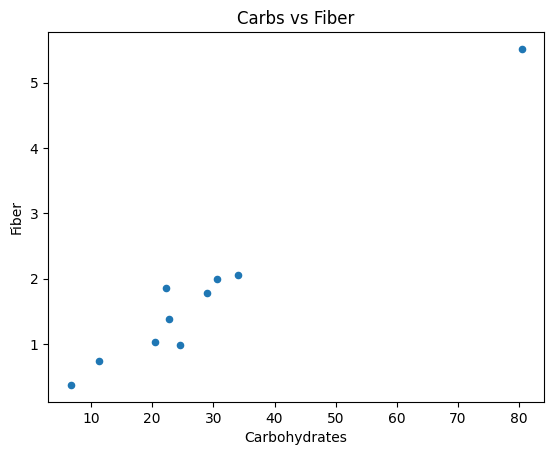

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE
def carbs_by_fiber(menu):
    menu_data = menu_nutrients(menu)

    plt.scatter(menu_data['Carbs'], menu_data['Fiber'], color='blue', alpha=0.5)
    plt.title('Carbs vs Fiber')
    plt.xlabel('Carbohydrates')
    plt.ylabel('Fiber')

    

#raise NotImplementedError()

Run the cell to display your plot. For grading purposes, this cell cannot be edited.

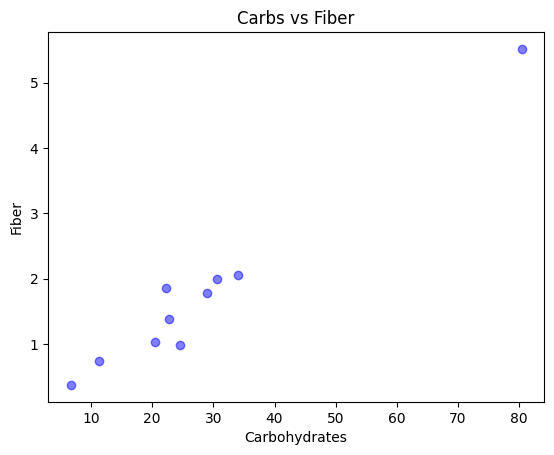

In [9]:
menu = ["pizza", "chicken", "apple", "banana", "bread", "smoothie", "fries", "fish", "pasta", "gelato"]
carbs_by_fiber(menu)

## Q4
**Points**: 1

Using the `menu_nutrients` function from Q2, write a new a function called `foods_carbs` that produces a bar plot showing which food has the most carbs. It should take a single parameter &ndash; a list of food items (i.e. a menu). 

For example, if the menu is:
```python
["pizza", "chicken", "apple", "banana", "bread", "smoothie", "fries", "fish", "pasta", "gelato"]
```
Then your plot should look like this:
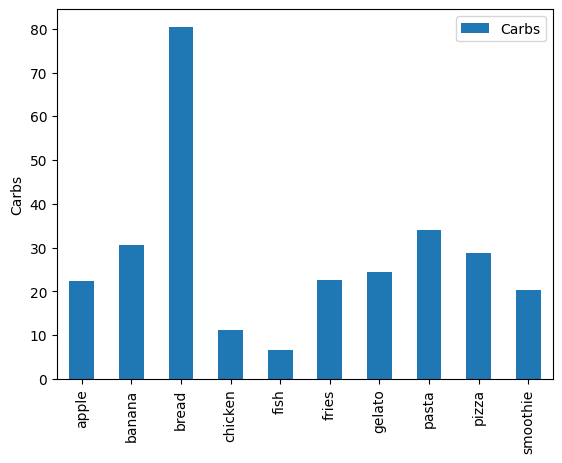

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE
def food_carbs(menu):
    menu_data = menu_nutrients(menu)

    menu_data['Carbs'].plot(kind='bar', color='blue')
    plt.title('Carbs Content in Food Menu')
    plt.xlabel('Food')
    plt.ylabel('Carbs')
    plt.xticks(rotation=45, ha='right')

#raise NotImplementedError()

Run the cell to display your plot. For grading purposes, this cell cannot be edited.

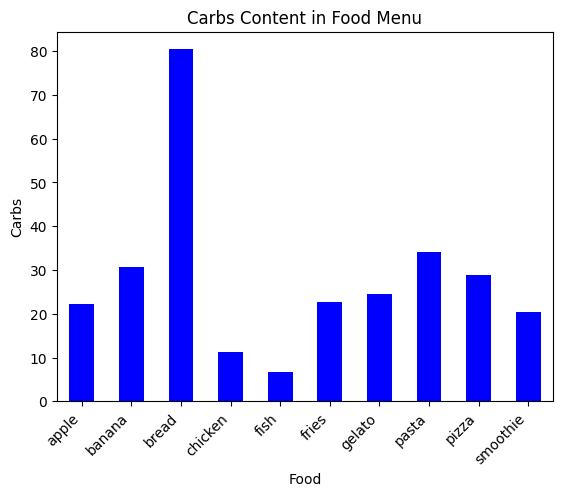

In [11]:
menu = ["pizza", "chicken", "apple", "banana", "bread", "smoothie", "fries", "fish", "pasta", "gelato"]
food_carbs(menu)

## Q5
**Points**: 1

Using the `menu_nutrients` function from Q2, write a new a function called `foods_fats` that produces a _sorted_ bar plot showing which food has the most fats. It should take a single parameter &ndash; a list of food items (i.e. a menu). 

For example, if the menu is:
```python
["pizza", "chicken", "apple", "banana", "bread", "smoothie", "fries", "fish", "pasta", "gelato"]
```
Then your plot should look like this:

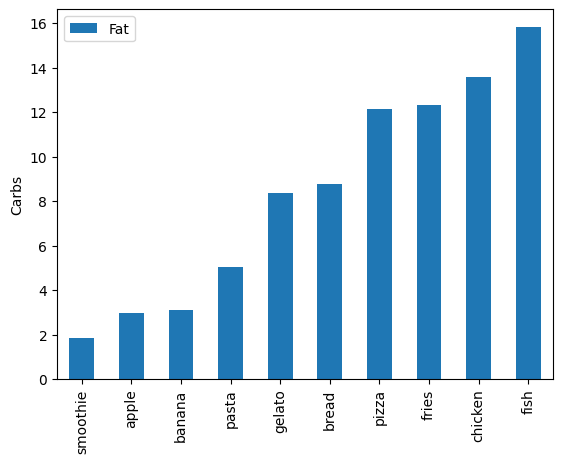

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE
def foods_fat(menu):
    menu_data = menu_nutrients(menu)
    
    menu_data['Fat'].sort_values(ascending=True).plot(kind='bar', color='blue')
    plt.title('Fat Content in Food Menu')
    plt.xlabel('Food')
    plt.ylabel('Fats')
    plt.xticks(rotation=45, ha='right')

    
#raise NotImplementedError()

Run the cell to display your plot. For grading purposes, this cell cannot be edited.

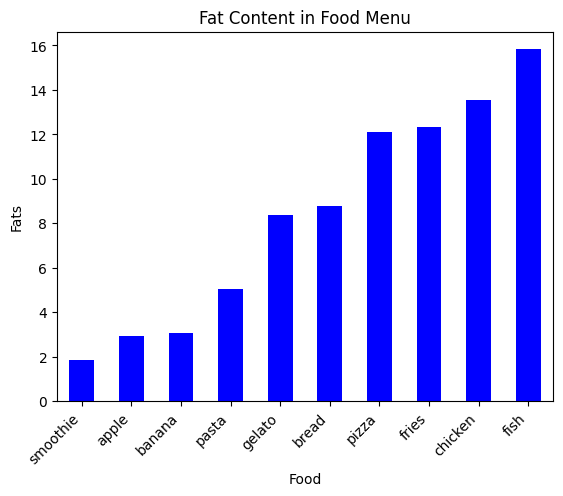

In [13]:
menu = ["pizza", "chicken", "apple", "banana", "bread", "smoothie", "fries", "fish", "pasta", "gelato"]
foods_fat(menu)